## **Using Intel image classification from Kaggle**

In [2]:
import os
import pathlib
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Activation, Conv2D, Dense, Dropout,
                                     Flatten, MaxPool2D)
from tensorflow.keras.losses import (BinaryCrossentropy,
                                     CategoricalCrossentropy,
                                     SparseCategoricalCrossentropy)
from tensorflow.keras.optimizers import Adam

In [4]:
from Create_helper_functions import walk_through_dir

### Checking the directories:

In [12]:
walk_through_dir("Intel image classification/Multiclass/")

There are 3 directories and 0 images in 'Intel image classification/Multiclass/'.
There are 1 directories and 0 images in 'Intel image classification/Multiclass/seg_pred'.
There are 0 directories and 7301 images in 'Intel image classification/Multiclass/seg_pred\seg_pred'.
There are 1 directories and 0 images in 'Intel image classification/Multiclass/seg_test'.
There are 6 directories and 0 images in 'Intel image classification/Multiclass/seg_test\seg_test'.
There are 0 directories and 437 images in 'Intel image classification/Multiclass/seg_test\seg_test\buildings'.
There are 0 directories and 474 images in 'Intel image classification/Multiclass/seg_test\seg_test\forest'.
There are 0 directories and 553 images in 'Intel image classification/Multiclass/seg_test\seg_test\glacier'.
There are 0 directories and 525 images in 'Intel image classification/Multiclass/seg_test\seg_test\mountain'.
There are 0 directories and 510 images in 'Intel image classification/Multiclass/seg_test\seg_test\

In [5]:
#Preprocess data and also create an augmented datagen


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

augmented_train_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.3,
                                            shear_range=0.3,
                                             zoom_range=0.3,
                                            width_shift_range = 0.3,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)

pred_datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
# Set up paths to our directories

train_dir = "Intel image classification/Multiclass/seg_train/seg_train/"
test_dir = "Intel image classification/Multiclass/seg_test/seg_test/"
pred_dir = "Intel image classification/Multiclass/seg_pred/seg_pred/"

### **Importing the data from train an test directories to create a simple model after**

In [7]:
# Import data from directories and turn it into batches

imsize = (150, 150)
class_mode = "categorical"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=imsize,
                                               class_mode=class_mode,
                                               seed=42,
                                               shuffle=False)

train_data_shuffled = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=imsize,
                                               class_mode=class_mode,
                                               seed=42,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size =32,
                                             target_size=imsize,
                                             class_mode = class_mode,
                                             seed=42,
                                             shuffle=False)

test_data_shuffled = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size =32,
                                             target_size=imsize,
                                             class_mode = class_mode,
                                             seed=42,
                                             shuffle=True)

train_data_aug = augmented_train_datagen.flow_from_directory(directory=train_dir,
                                                       batch_size=32,
                                                       target_size = imsize,
                                                       class_mode=class_mode,
                                                       shuffle=True)

pred_data = pred_datagen.flow_from_directory(directory=pred_dir,
                                             target_size = imsize,
                                             class_mode= class_mode,
                                             seed=42,
                                             batch_size=32,
                                             shuffle = False)

Found 14034 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [9]:
train_data[1]

(array([[[[0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.00784314, 0.00784314, 0.        ],
          [0.00784314, 0.00784314, 0.        ],
          [0.01176471, 0.01176471, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.07450981, 0.07843138, 0.02352941],
          [0.09411

In [10]:
#Let's get the class names

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [11]:
def view_random_image(target_dir, target_class):
    
    target_folder = target_dir+target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    #Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    # print(f"Image shape: {img.shape}")
    return img

['3803.jpg']
Image shape: (150, 150, 3)


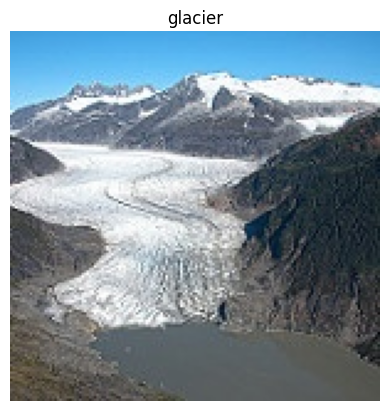

In [12]:
img = view_random_image(train_dir, random.choice(class_names))

In [13]:
from Create_helper_functions import create_tensorboard_callback

In [20]:
# Creating a simple model without data augmentation 

tf.random.set_seed(42)


model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(6, activation="softmax")
])

model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])


history = model.fit(train_data, epochs = 5,
                    validation_data= train_data,
                    validation_steps = int(0.15 * len(train_data)),
                    callbacks = [create_tensorboard_callback(dir_name="multiclass_experiments",
                                                             experiment_name="simple_model")],
                    verbose=2)

Saving TensorBoard log files to: multiclass_experiments/simple_model/20221101-115351
Epoch 1/5
439/439 - 40s - loss: 1.0615 - accuracy: 0.5832 - val_loss: 0.8446 - val_accuracy: 0.7130 - 40s/epoch - 91ms/step
Epoch 2/5
439/439 - 18s - loss: 0.8135 - accuracy: 0.6974 - val_loss: 0.7548 - val_accuracy: 0.7216 - 18s/epoch - 42ms/step
Epoch 3/5
439/439 - 14s - loss: 0.7261 - accuracy: 0.7360 - val_loss: 0.6879 - val_accuracy: 0.7639 - 14s/epoch - 33ms/step
Epoch 4/5
439/439 - 15s - loss: 0.6669 - accuracy: 0.7607 - val_loss: 0.6406 - val_accuracy: 0.7841 - 15s/epoch - 34ms/step
Epoch 5/5
439/439 - 15s - loss: 0.6177 - accuracy: 0.7797 - val_loss: 0.5877 - val_accuracy: 0.8139 - 15s/epoch - 34ms/step


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 10)       0

In [22]:
#Set checkpoint path 
checkpoint_path = "checkpoint_weights/"
# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_the_best_only=False,
                                                         save_weights_only=True,
                                                         save_freq ="epoch",
                                                         verbose=2)

In [64]:
# Creating another model with augmented data

tf.random.set_seed(42)


model_aug = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(6, activation="softmax")
])

model_aug.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])


history_aug = model_aug.fit(train_data_aug, epochs = 5,
          validation_data=test_data,
          validation_steps=int(0.15 * len(test_data)),
          callbacks = [create_tensorboard_callback(dir_name="multiclass_experiments",
                                                   experiment_name="simple_model_with_aug_data")],
          verbose=2)

Saving TensorBoard log files to: multiclass_experiments/simple_model_with_aug_data/20221101-121801
Epoch 1/5
439/439 - 63s - loss: 1.2268 - accuracy: 0.5097 - val_loss: 0.6398 - val_accuracy: 0.7879 - 63s/epoch - 143ms/step
Epoch 2/5
439/439 - 63s - loss: 1.0306 - accuracy: 0.5988 - val_loss: 1.1590 - val_accuracy: 0.4353 - 63s/epoch - 143ms/step
Epoch 3/5
439/439 - 64s - loss: 0.9676 - accuracy: 0.6269 - val_loss: 0.8512 - val_accuracy: 0.6562 - 64s/epoch - 147ms/step
Epoch 4/5
439/439 - 60s - loss: 0.9194 - accuracy: 0.6525 - val_loss: 0.7576 - val_accuracy: 0.7031 - 60s/epoch - 137ms/step
Epoch 5/5
439/439 - 61s - loss: 0.8782 - accuracy: 0.6695 - val_loss: 0.7728 - val_accuracy: 0.6942 - 61s/epoch - 139ms/step


In [24]:
def plot_loss(history):
    """ Return seperate loss curves for training and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    
    # Plot loss
    
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

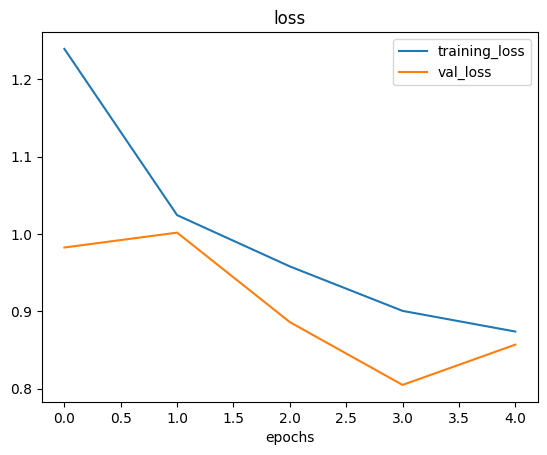

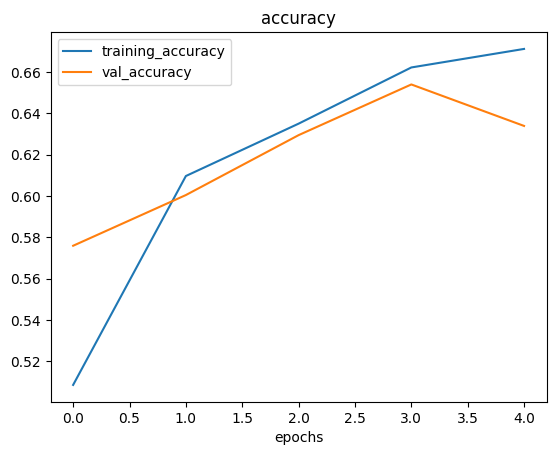

In [25]:
# Plotting the accuracy and loss curves

plot_loss(history_aug)

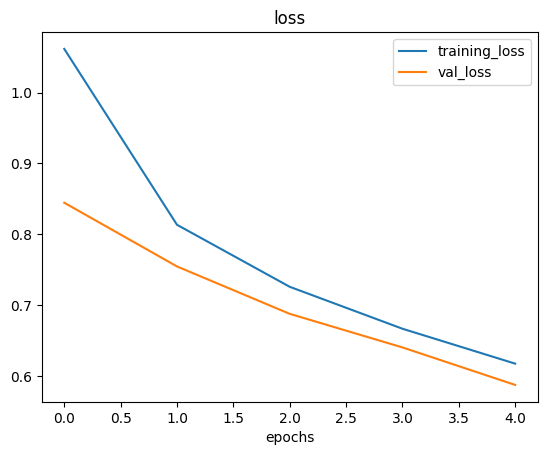

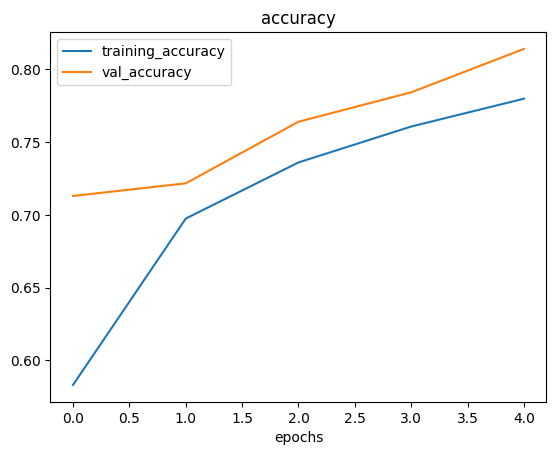

In [26]:
plot_loss(history)

### The model without augmented data had better results so I'm gonna work with that one later

In [27]:
result = model.evaluate(test_data, verbose=2)
result

94/94 - 6s - loss: 0.7066 - accuracy: 0.7507 - 6s/epoch - 65ms/step


[0.7066047191619873, 0.7506666779518127]

In [28]:
result_aug = model_aug.evaluate(test_data, verbose=2)
result_aug

94/94 - 3s - loss: 0.7009 - accuracy: 0.7513 - 3s/epoch - 36ms/step


[0.7008877992630005, 0.7513333559036255]

## I'm gonna add a dropout layer to the existing model to check the evaluation results

In [29]:

model_with_dropout = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(150, 150, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(6, activation="softmax")
])

In [30]:

model_with_dropout.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])


history_w_do = model_with_dropout.fit(train_data, epochs = 9,
                    validation_data= train_data,
                    validation_steps = int(0.15 * len(train_data)),
                    callbacks = [create_tensorboard_callback(dir_name="multiclass_experiments",
                                                             experiment_name="simple_model_w_dropout"),
                                 checkpoint_callback],
                    verbose=2)

Saving TensorBoard log files to: multiclass_experiments/simple_model_w_dropout/20221101-120238
Epoch 1/9

Epoch 1: saving model to checkpoint_weights\
439/439 - 17s - loss: 1.0393 - accuracy: 0.5932 - val_loss: 0.7436 - val_accuracy: 0.7413 - 17s/epoch - 39ms/step
Epoch 2/9

Epoch 2: saving model to checkpoint_weights\
439/439 - 22s - loss: 0.7545 - accuracy: 0.7257 - val_loss: 0.6458 - val_accuracy: 0.7740 - 22s/epoch - 49ms/step
Epoch 3/9

Epoch 3: saving model to checkpoint_weights\
439/439 - 28s - loss: 0.6707 - accuracy: 0.7612 - val_loss: 0.6136 - val_accuracy: 0.7889 - 28s/epoch - 63ms/step
Epoch 4/9

Epoch 4: saving model to checkpoint_weights\
439/439 - 28s - loss: 0.6238 - accuracy: 0.7824 - val_loss: 0.5800 - val_accuracy: 0.7894 - 28s/epoch - 64ms/step
Epoch 5/9

Epoch 5: saving model to checkpoint_weights\
439/439 - 26s - loss: 0.5966 - accuracy: 0.7867 - val_loss: 0.5374 - val_accuracy: 0.8197 - 26s/epoch - 58ms/step
Epoch 6/9

Epoch 6: saving model to checkpoint_weights\

In [31]:

results_with_dropout= model_with_dropout.evaluate(test_data, verbose= 2)
results_with_dropout

94/94 - 3s - loss: 0.5778 - accuracy: 0.7987 - 3s/epoch - 29ms/step


[0.5778040289878845, 0.7986666560173035]

In [32]:
result, result_aug

([0.7066047191619873, 0.7506666779518127],
 [0.7008877992630005, 0.7513333559036255])

#### **Results are better but still not the best Im trying to use transfer learning if the accuracy is not good enough gonna need fine-tuning**
**(Xception)**

In [33]:
# First Xception model and fitting without data augmentation and unfrozen layers 

def model_xception():
    base_m = tf.keras.applications.Xception(input_shape=(150,150,3), include_top=False)
    base_m.trainable = False

    inputs = tf.keras.layers.Input(shape = (150, 150, 3), name= "input_layer")
    x = base_m(inputs, training=False)
    
    x = layers.GlobalAveragePooling2D(name="globavpool2D")(x)
    outputs = Dense(6, activation="softmax", name="output_layer")(x)
    m = tf.keras.Model(inputs, outputs)
    return m

In [34]:
model_xception = model_xception()

In [35]:
model_xception.compile(loss=CategoricalCrossentropy(),
                       optimizer=Adam(),
                       metrics = ["accuracy"])

In [79]:
history_mxception = model_xception.fit(train_data, epochs=5,
                   validation_data=test_data,
                   validation_steps= int(0.15 * len(test_data)),
                   callbacks=[create_tensorboard_callback(dir_name="multiclass_experiments",
                                                     experiment_name="model_xception"),
                         checkpoint_callback],
             verbose=2)

Saving TensorBoard log files to: multiclass_experiments/model_xception/20221101-125550
Epoch 1/5

Epoch 1: saving model to checkpoint_weights\
439/439 - 72s - loss: 0.1868 - accuracy: 0.9326 - val_loss: 0.1339 - val_accuracy: 0.9531 - 72s/epoch - 163ms/step
Epoch 2/5

Epoch 2: saving model to checkpoint_weights\
439/439 - 62s - loss: 0.1770 - accuracy: 0.9374 - val_loss: 0.2355 - val_accuracy: 0.9174 - 62s/epoch - 142ms/step
Epoch 3/5

Epoch 3: saving model to checkpoint_weights\
439/439 - 51s - loss: 0.1699 - accuracy: 0.9381 - val_loss: 0.3783 - val_accuracy: 0.8616 - 51s/epoch - 116ms/step
Epoch 4/5

Epoch 4: saving model to checkpoint_weights\
439/439 - 55s - loss: 0.1618 - accuracy: 0.9421 - val_loss: 0.3844 - val_accuracy: 0.8750 - 55s/epoch - 125ms/step
Epoch 5/5

Epoch 5: saving model to checkpoint_weights\
439/439 - 57s - loss: 0.1546 - accuracy: 0.9456 - val_loss: 0.2728 - val_accuracy: 0.8929 - 57s/epoch - 130ms/step


In [37]:
result_xception = model_xception.evaluate(test_data, verbose=2)
result_xception

94/94 - 10s - loss: 0.2655 - accuracy: 0.8983 - 10s/epoch - 102ms/step


[0.26554208993911743, 0.8983333110809326]

In [38]:
def load_and_prep_image(filename, img_shape=150, scale=True):
  """

  Reads in an image from filename, turns it into a tensor and reshapes into

  (150, 150, 3).


  Parameters

  ----------

  filename (str): string filename of target image

  img_shape (int): size to resize target image to, default 224

  scale (bool): whether to scale pixel values to range(0, 1), default True
  """

  # Read in the image
  with open(filename, "r", encoding="ISO-8859-1") as f:
      img = tf.io.read_file(filename)

      # Decode it into a tensor

      img = tf.image.decode_jpeg(img)

      # Resize the image

      img = tf.image.resize(img, [img_shape, img_shape])

  if scale:

    # Rescale the image (get all values between 0 and 1)

    return img/255.

  else:
    return img

In [39]:
class_names = train_data.class_indices
class_names

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [40]:
class_names = list(class_names.keys())
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [41]:
# Make predictions with our model
pred_probs= model_xception.predict(test_data, verbose=2)

94/94 - 9s - 9s/epoch - 96ms/step


In [42]:
len(pred_probs)

3000

In [43]:
pred_probs.shape

(3000, 6)

In [44]:
pred_probs[0]

array([9.9923444e-01, 5.6651033e-06, 2.6854763e-05, 3.8674302e-06,
       7.0774235e-04, 2.1378244e-05], dtype=float32)

In [45]:
print(f"Number of prediction probabilites for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: \n {pred_probs[0].argmax()}")


Number of prediction probabilites for sample 0: 6
What prediction probability sample 0 looks like:
 [9.9923444e-01 5.6651033e-06 2.6854763e-05 3.8674302e-06 7.0774235e-04
 2.1378244e-05]
The class with the highest predicted probability by the model for sample 0: 
 0


In [46]:
pred_classes = pred_probs.argmax(axis=1)

In [47]:
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
y_true = test_data.classes 
y_true

array([0, 0, 0, ..., 5, 5, 5])

In [49]:
def make_predictions_on_4images(class_names, file_directory):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        # Choose a random image from a random class
        class_name = random.choice(class_names)
        filename = file_directory + class_name
        random_filename = random.choice(os.listdir(filename))
        filepath = file_directory + class_name + "/" + random_filename
        
        #Load the image and make predictions
        img = load_and_prep_image(filepath, scale=False)
        img_expanded = tf.expand_dims(img, axis=0)
        pred_prob = model_xception.predict(img_expanded) # get pred probabilities
        pred_class = class_names[pred_prob.argmax()]
        
        # Plot the images 
        plt.subplot(2, 2, i+1)
        plt.imshow(img/255.)
        if class_name == pred_class:
            title_color = "g"
        else:
            title_color = "r"
            
        plt.title(f"original: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
        plt.axis(False)
        
        

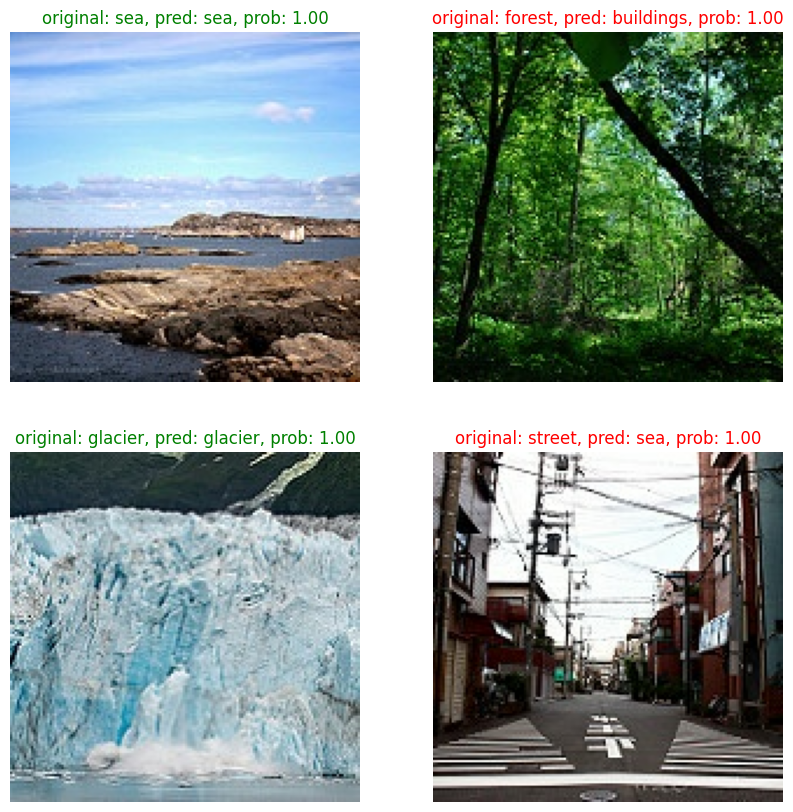

In [63]:
make_predictions_on_4images(class_names=class_names, file_directory=test_dir)

In [51]:
from Create_helper_functions import make_confusion_matrix

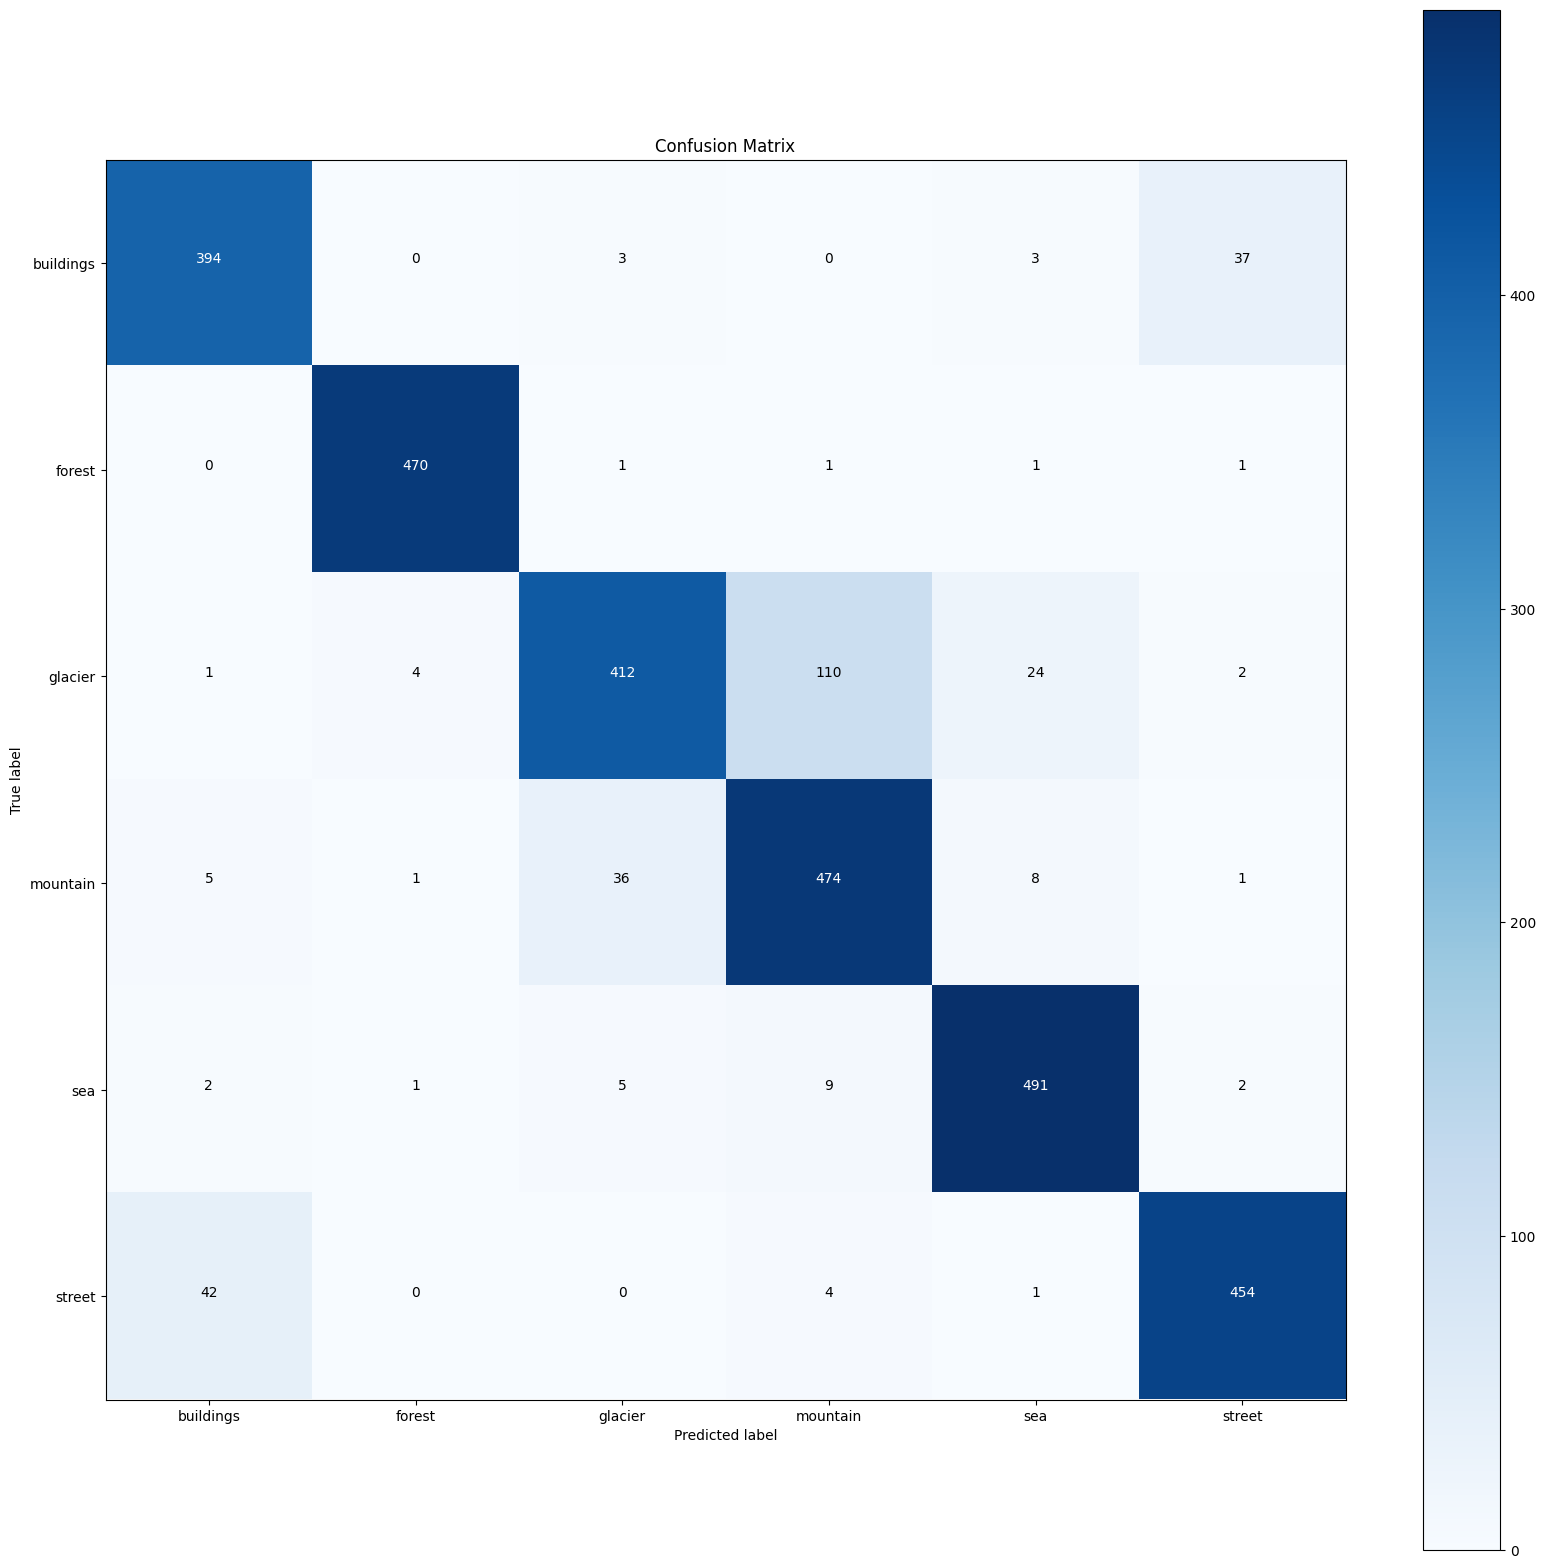

In [52]:
make_confusion_matrix(y_true=y_true, y_pred=pred_classes, classes=class_names, figsize=(20,20), text_size=10)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_true=y_true, y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       437
           1       0.99      0.99      0.99       474
           2       0.90      0.75      0.82       553
           3       0.79      0.90      0.84       525
           4       0.93      0.96      0.95       510
           5       0.91      0.91      0.91       501

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



In [55]:
classification_report_dict = classification_report(y_true, pred_classes, output_dict=True)

In [56]:
# Create empty dict

class_f1_scores = {}

# loop htrough classification report dictionary items

for k, v in classification_report_dict.items():
    if k == "accuracy": #stop once we get to accuracy key
        break
    else:
        # Add classnames and f1-scores to new dict
        class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'buildings': 0.8944381384790012,
 'forest': 0.9894736842105263,
 'glacier': 0.8158415841584159,
 'mountain': 0.8441674087266252,
 'sea': 0.9460500963391137,
 'street': 0.909819639278557}

In [57]:
# turns f1 scores into DataFrame in a descending order so we will know better
# which class got the highest scores


f1_scores = pd.DataFrame({"class_names" : list(class_f1_scores.keys()),
                          "f1_scores" : list(class_f1_scores.values())}).sort_values("f1_scores", ascending=False)

f1_scores

class_names  f1_scores
1      forest   0.989474
4         sea   0.946050
5      street   0.909820
0   buildings   0.894438
3    mountain   0.844167
2     glacier   0.815842

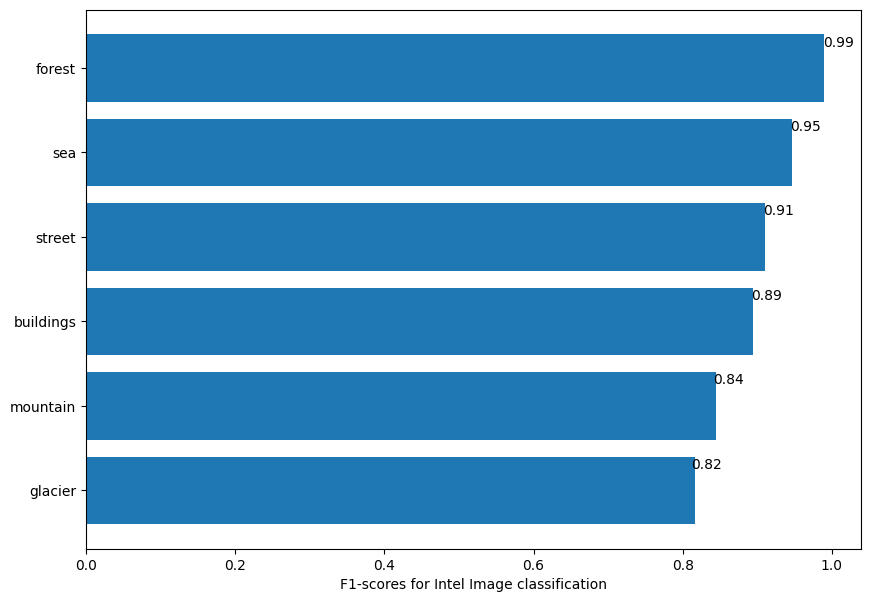

In [58]:
width = 0.1

fig, ax = plt.subplots(figsize=(10, 7))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1_scores"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-scores for Intel Image classification")
ax.invert_yaxis()  #reverse the order of our plot

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.02*width, rect.get_y() + rect.get_height()/4.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [65]:
%load_ext tensorboard

In [67]:
%tensorboard dev upload --logdir ./multiclass_experiments \
    --name "Different kind of model experiments for Intel image classification" \
    --description "Creating multiple model to find the best val_accuracy for the dataset" \
    --one_shot
    

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stdout:
New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/vLu4S5M3RQKg3Z8cXtawDA/

[2022-11-01T12:34:22] Started scanning logdir.
Data upload starting...
Uploading 144 scalars...
[2022-11-01T12:34:23] Total uploaded: 144 scalars, 0 tensors, 0 binary objects
[2022-11-01T12:34:23] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/vLu4S5M3RQKg3Z8cXtawDA/

In [76]:
# First Xception model and fitting without data augmentation and unfrozen layers 

def model_xception_finet():
    base_m = tf.keras.applications.Xception(input_shape=(150,150,3), include_top=False)
    base_m.trainable = True
    # Unfreeze only the last 10 layers
    for layer in base_m.layers[:-10]:
        layer.trainable = False
    inputs = tf.keras.layers.Input(shape = (150, 150, 3), name= "input_layer")
    x = base_m(inputs, training=False)
    
    x = layers.GlobalAveragePooling2D(name="globavpool2D")(x)
    outputs = Dense(6, activation="softmax", name="output_layer")(x)
    m = tf.keras.Model(inputs, outputs)
    return m

In [77]:
model_xception_finet = model_xception_finet()

In [82]:
model_xception_finet.compile(loss=CategoricalCrossentropy(),
                             optimizer = Adam(learning_rate=0.0001),
                             metrics = ["accuracy"])

In [83]:
fine_tune_epochs = 10

history_xception_fine = model_xception_finet.fit(train_data, epochs=fine_tune_epochs,
                                                  initial_epoch= history_mxception.epoch[-1],
                                                  validation_data= test_data,
                                                  validation_steps = int(0.15 * len(test_data)),
                                                  callbacks = [create_tensorboard_callback(dir_name="multiclass_experiments",
                                                                                          experiment_name="model_xception_finetuning")],
                                                  verbose=2)

Saving TensorBoard log files to: multiclass_experiments/model_xception_finetuning/20221101-131341
Epoch 5/10
439/439 - 76s - loss: 0.2983 - accuracy: 0.8918 - val_loss: 0.4967 - val_accuracy: 0.8036 - 76s/epoch - 173ms/step
Epoch 6/10
439/439 - 34s - loss: 0.1775 - accuracy: 0.9352 - val_loss: 0.2246 - val_accuracy: 0.9174 - 34s/epoch - 78ms/step
Epoch 7/10
439/439 - 27s - loss: 0.1332 - accuracy: 0.9510 - val_loss: 0.2076 - val_accuracy: 0.9353 - 27s/epoch - 61ms/step
Epoch 8/10
439/439 - 27s - loss: 0.1013 - accuracy: 0.9615 - val_loss: 0.3307 - val_accuracy: 0.8817 - 27s/epoch - 62ms/step
Epoch 9/10
439/439 - 27s - loss: 0.0772 - accuracy: 0.9736 - val_loss: 0.2187 - val_accuracy: 0.9263 - 27s/epoch - 61ms/step
Epoch 10/10
439/439 - 27s - loss: 0.0558 - accuracy: 0.9809 - val_loss: 0.2375 - val_accuracy: 0.9219 - 27s/epoch - 61ms/step


In [84]:
result_xception_fine = model_xception_finet.evaluate(test_data, verbose=2)
result_xception_fine

94/94 - 5s - loss: 0.2209 - accuracy: 0.9250 - 5s/epoch - 56ms/step


[0.22094136476516724, 0.925000011920929]

In [85]:
from Create_helper_functions import compare_historys

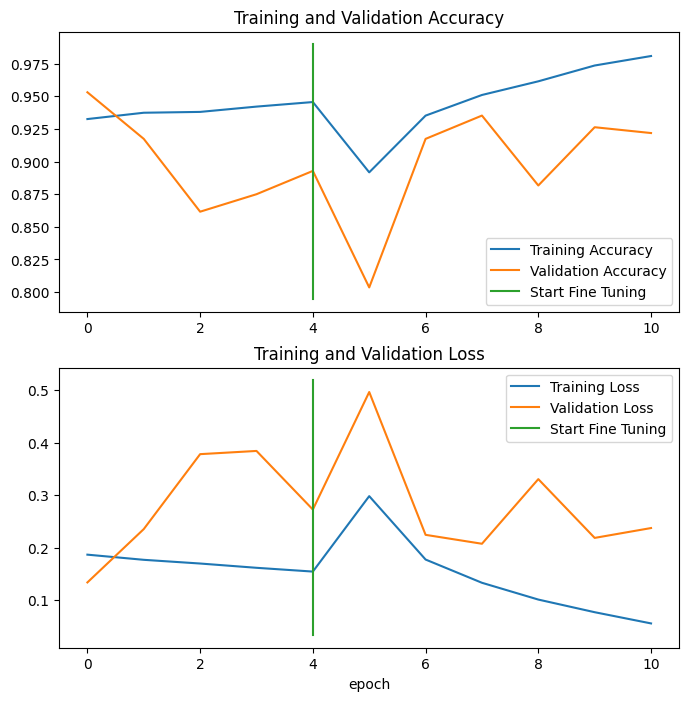

In [86]:
compare_historys(original_history=history_mxception,
                 new_history=history_xception_fine,
                 initial_epochs=5)

In [89]:
def make_predictions_on_4images_fine(class_names, file_directory):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        # Choose a random image from a random class
        class_name = random.choice(class_names)
        filename = file_directory + class_name
        random_filename = random.choice(os.listdir(filename))
        filepath = file_directory + class_name + "/" + random_filename
        
        #Load the image and make predictions
        img = load_and_prep_image(filepath, scale=False)
        img_expanded = tf.expand_dims(img, axis=0)
        pred_prob = model_xception_finet.predict(img_expanded) # get pred probabilities
        pred_class = class_names[pred_prob.argmax()]
        
        # Plot the images 
        plt.subplot(2, 2, i+1)
        plt.imshow(img/255.)
        if class_name == pred_class:
            title_color = "g"
        else:
            title_color = "r"
            
        plt.title(f"original: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
        plt.axis(False)

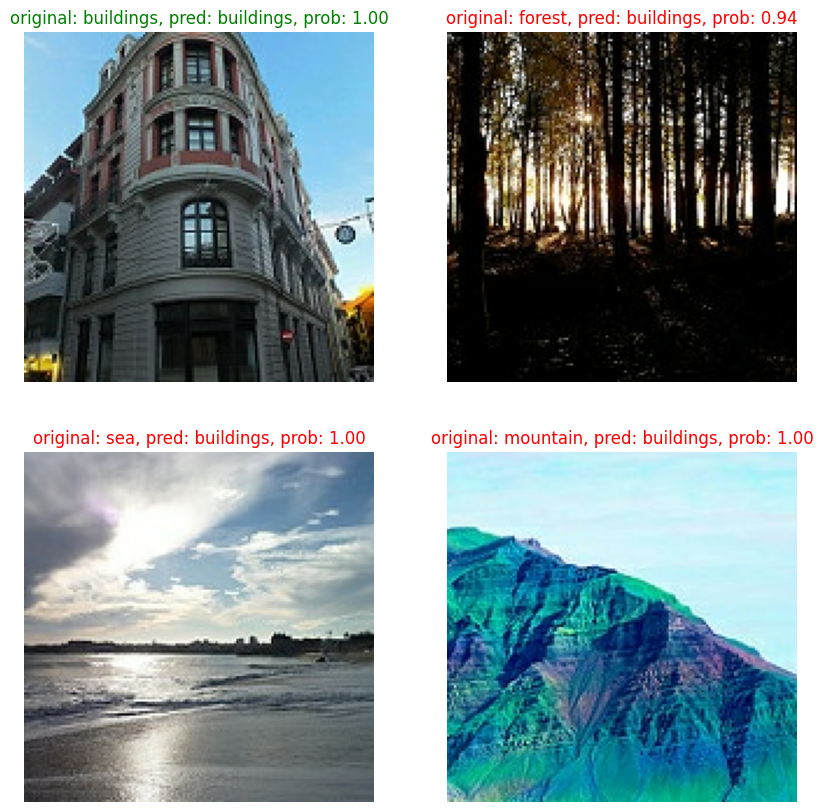

In [122]:
make_predictions_on_4images_fine(class_names=class_names, file_directory=test_dir)

In [151]:
fine_tune_epochs = 10

history_xception_fine2 = model_xception_finet.fit(train_data, epochs=fine_tune_epochs,
                                                  initial_epoch= history_mxception.epoch[-1],
                                                  validation_data= test_data,
                                                  validation_steps = int(0.15 * len(test_data)),
                                                  callbacks = [create_tensorboard_callback(dir_name="multiclass_experiments",
                                                                                          experiment_name="model_xception_finetuning2")],
                                                  verbose=2)

Saving TensorBoard log files to: multiclass_experiments/model_xception_finetuning2/20221101-134451
Epoch 5/10
439/439 - 27s - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.2348 - val_accuracy: 0.9241 - 27s/epoch - 61ms/step
Epoch 6/10
439/439 - 27s - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.2867 - val_accuracy: 0.9308 - 27s/epoch - 61ms/step
Epoch 7/10
439/439 - 27s - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.3829 - val_accuracy: 0.9219 - 27s/epoch - 61ms/step
Epoch 8/10
439/439 - 27s - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.4983 - val_accuracy: 0.9018 - 27s/epoch - 61ms/step
Epoch 9/10
439/439 - 26s - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.4994 - val_accuracy: 0.9174 - 26s/epoch - 60ms/step
Epoch 10/10
439/439 - 26s - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.2671 - val_accuracy: 0.9353 - 26s/epoch - 60ms/step


In [128]:
result_with_shuffled_test = model_xception_finet.evaluate(test_data_shuffled, verbose=2)
result_with_shuffled_test

94/94 - 5s - loss: 0.2874 - accuracy: 0.9060 - 5s/epoch - 55ms/step


[0.28739696741104126, 0.906000018119812]

In [129]:
result_without_shuffled_test = model_xception_finet.evaluate(test_data, verbose=2)
result_without_shuffled_test

94/94 - 5s - loss: 0.2874 - accuracy: 0.9060 - 5s/epoch - 54ms/step


[0.28739702701568604, 0.906000018119812]

In [130]:
np.isclose(result_with_shuffled_test, result_without_shuffled_test)

array([ True,  True])

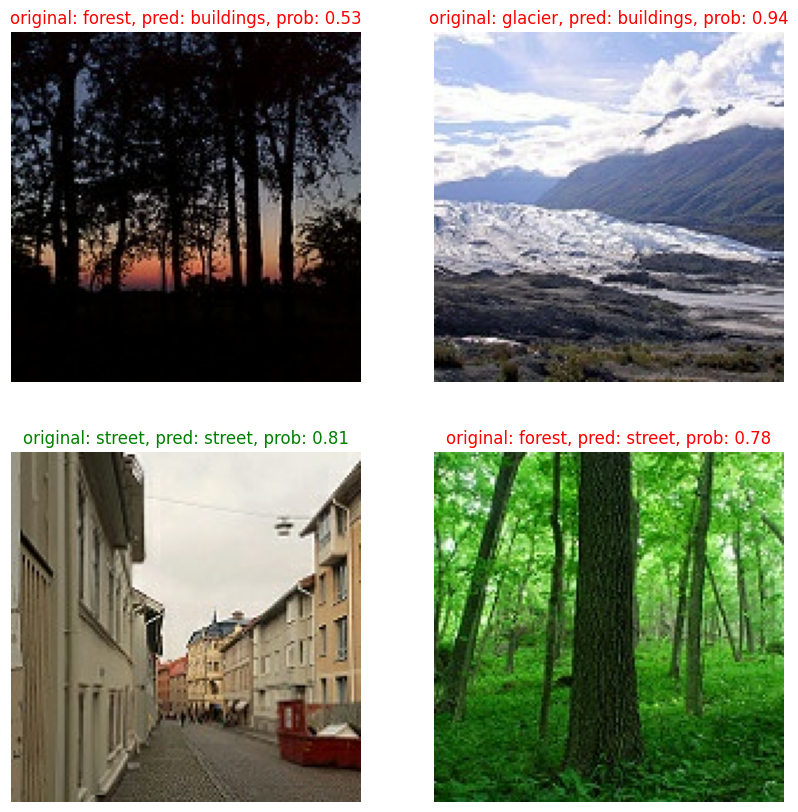

In [145]:
make_predictions_on_4images_fine(class_names=class_names, file_directory=test_dir)

In [149]:
custom_ims = ["custom images for intel image multi/" + im_path for im_path in os.listdir("custom images for intel image multi")]
custom_ims

['custom images for intel image multi/07cli-glaciers1-mobileMasterAt3x.jpg',
 'custom images for intel image multi/Forests.jpg',
 'custom images for intel image multi/Georgia5and120loop.jpg',
 'custom images for intel image multi/gettyimages-1207663571-612x612.jpg',
 'custom images for intel image multi/glacier.jpeg',
 'custom images for intel image multi/images.jpeg',
 'custom images for intel image multi/p0973lkk.jpg',
 'custom images for intel image multi/pexels-kellie-churchman-1001682.jpg',
 'custom images for intel image multi/pexels-pixabay-302769.jpg',
 'custom images for intel image multi/photo-1448375240586-882707db888b.jpeg',
 'custom images for intel image multi/somalaya-mountain-range-title.jpg',
 'custom images for intel image multi/v2gQQH6Qq5EAJSemo1Yqie27aYBOHE4pSwA6jSkFHKg.jpg']

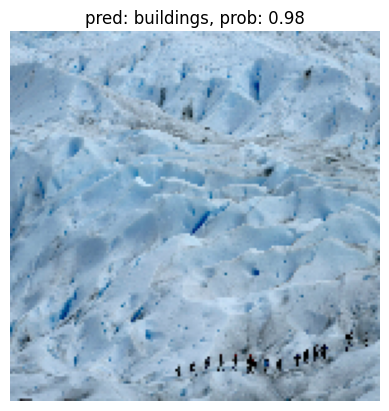

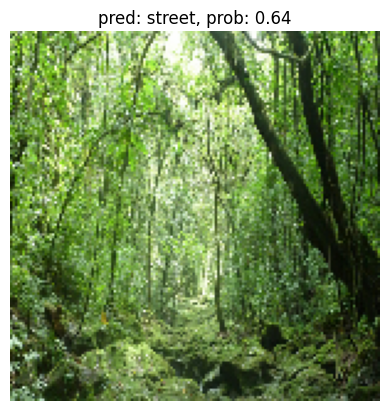

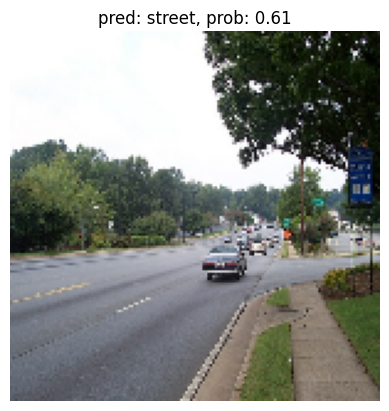

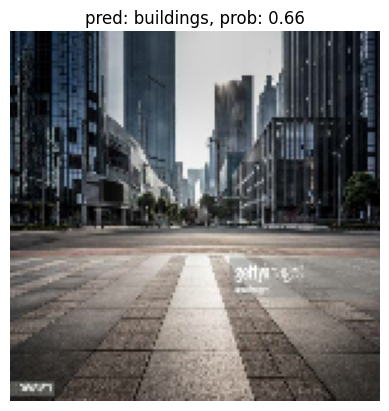

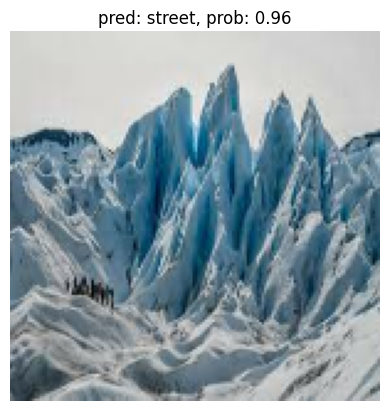

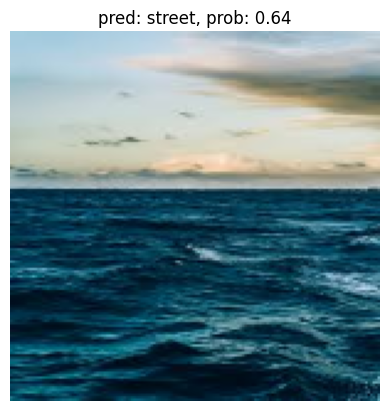

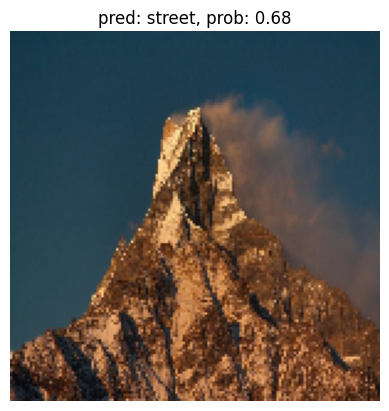

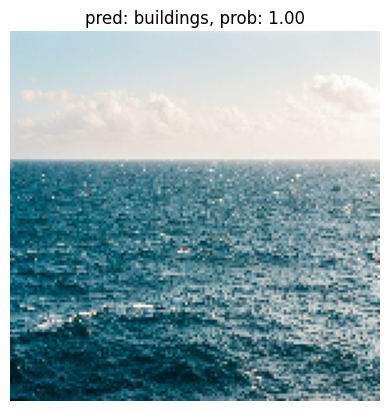

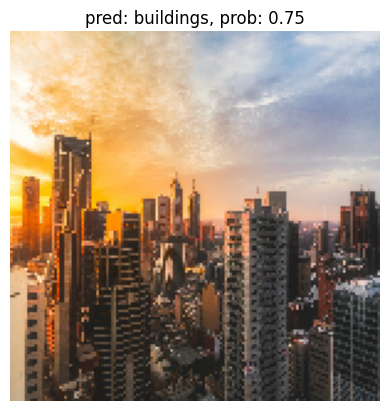

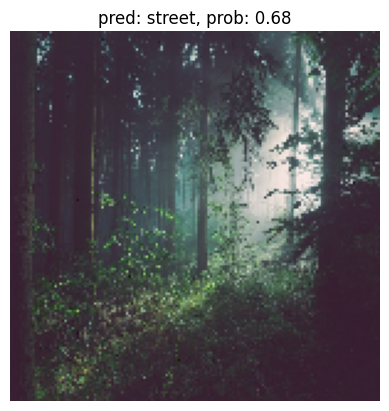

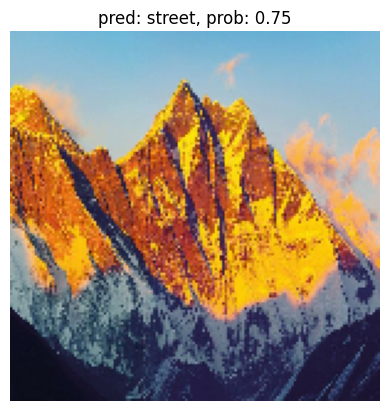

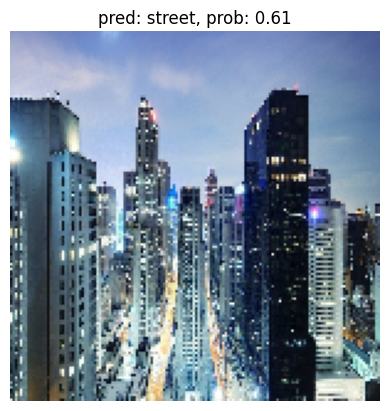

In [150]:

for img in custom_ims:
    img = load_and_prep_image(img, scale=False)
    pred_probs = model_xception_finet.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_probs.argmax()]
    plt.figure()
    plt.imshow(img/255.)
    plt.title(f"pred: {pred_class}, prob: {pred_probs.max():.2f}")
    plt.axis(False)
    